## Johnny Marcos Silva Soares 385161

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples 
from matplotlib import cm
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.cluster import DBSCAN 
from matplotlib import cm
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import euclidean
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as  LDA
from sklearn import cluster
from sklearn.metrics import silhouette_samples 
from matplotlib import cm
from fbprophet import Prophet
import gmaps
from datetime import datetime
from datetime import date
from pyramid.arima import auto_arima
from arch import arch_model
%matplotlib inline

/home/johnny/anaconda3/lib/python3.6/site-packages/gmaps/maps.py:191: DeprecationWarning: metadata {'trait': <traitlets.traitlets.Instance object at 0x7ff52f1f3908>} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  layers = Tuple(trait=Instance(widgets.Widget)).tag(
/home/johnny/anaconda3/lib/python3.6/site-packages/gmaps/errors_box.py:15: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  errors = List(trait=Unicode).tag(sync=True)
/home/johnny/anaconda3/lib/python3.6/site-packages/gmaps/figure.py:37: DeprecationWarning: metadata {'default': None} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  _toolbar = Instance(Toolbar, allow_none=True, default=None).tag(
/home/johnny/anaconda3/lib/python3.6/s

## Informações sobre o problema

O trabalho buscava reconhecer padrões dos crimes em Vancouver e dado uma nova ocorrência, conseguir classificar qual crime ocorreu.<br>
Inicialmente foi proposto uma classificação, porém, não foi possível chegar em 50% de acurácia, mesmo aplicando engenharia de features para encontrar novas features.<br>
Logo após, tratei o problema como clusterização para tentar agrupar os dados, com o intuito de encontrar alguma semelhança, porém, não obtive sucesso, pois as classes geradas na clusterização não ajudavam a gerar um novo entendimento ou padrão para o problema.<br>
O único resultado encontrado e importante foi considerando o problema como forecast (previsão), sendo possível encontrar uma previsão do número de crimes que poderiam acontecer nos anos seguintes.


Como se trata de um previsão e os valores são semelhantes a uma regressão, então, o RMSE será utilizado.

## Dataset Original

O dataset original possui 12 features e 530652 linhas.<br/>
Link dataset original:<a href="https://www.kaggle.com/wosaku/crime-in-vancouver">https://www.kaggle.com/wosaku/crime-in-vancouver</a><br>
58,9 MB alocados para armazenar o dataset. <br>

Features:<br>
   **TYPE**:
<ol>
  <li>Break and Enter Commercial</li>
  <li>Break and Enter Residential/Other</li>
  <li>Mischief', 'Other Theft</li>
  <li>Theft from Vehicle</li>
  <li>Theft of Bicycle</li>
  <li>Theft of Vehicle</li>
  <li>Vehicle Collision or Pedestrian Struck (with Fatality)</li>
    <li>Vehicle Collision or Pedestrian Struck (with Injury)</li>
</ol>
   **YEAR**:<br>Ano da ocorrência do crime. 2003 - 2017.<br>
   
   **MONTH**:<br>Mês da ocorrência do crime.<br>
   
   **DAY**:<br>
   Dia da ocorrência do crime.<br>
    
   **HOUR**:<br>
   Hora da ocorrência do crime.<br>
   
   **MINUTE**:<br>
   Minuto da ocorrência do crime.<br>
   
   **HUNDRED_BLOCK**:<br>
   Bloco de ocorrência do crime.<br>
   
   **NEIGHBOURHOOD**:<br>
   Bairro da ocorrência do crime.<br>
   
   **X**:<br>
   Posição X cartesiano da ocorrência do crime.<br>
   
   **Y**:<br>
   Posição Y cartesiano da ocorrência do crime.<br>
   
   **Latitude**:<br>
   Latitude da ocorrência do crime.<br>
   
   **Longitude**:<br>
   Longitude da ocorrência do crime.<br>



In [2]:
dataset2 = pd.read_csv("crime.csv")
dataset2.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


Correlação

In [3]:
dataset2.corr()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
YEAR,1.000000,-0.036760,-0.006259,-0.010584,0.061995,-0.021933,-0.021905,-0.021905,0.021960
MONTH,-0.036760,1.000000,0.008962,0.000165,-0.005977,0.000980,0.000841,0.000841,-0.000838
DAY,-0.006259,0.008962,1.000000,0.004865,0.005272,-0.004024,-0.004049,-0.004049,0.004043
HOUR,-0.010584,0.000165,0.004865,1.000000,-0.049010,0.000325,-0.018249,-0.018259,0.000343
MINUTE,0.061995,-0.005977,0.005272,-0.049010,1.000000,0.018892,0.048568,0.048622,0.018827
X,-0.021933,0.000980,-0.004024,0.000325,0.018892,1.000000,0.999843,0.999843,-0.999831
Y,-0.021905,0.000841,-0.004049,-0.018249,0.048568,0.999843,1.000000,1.000000,-0.999999
Latitude,-0.021905,0.000841,-0.004049,-0.018259,0.048622,0.999843,1.000000,1.000000,-0.999999
Longitude,0.021960,-0.000838,0.004043,0.000343,0.018827,-0.999831,-0.999999,-0.999999,1.000000


 Histogramas

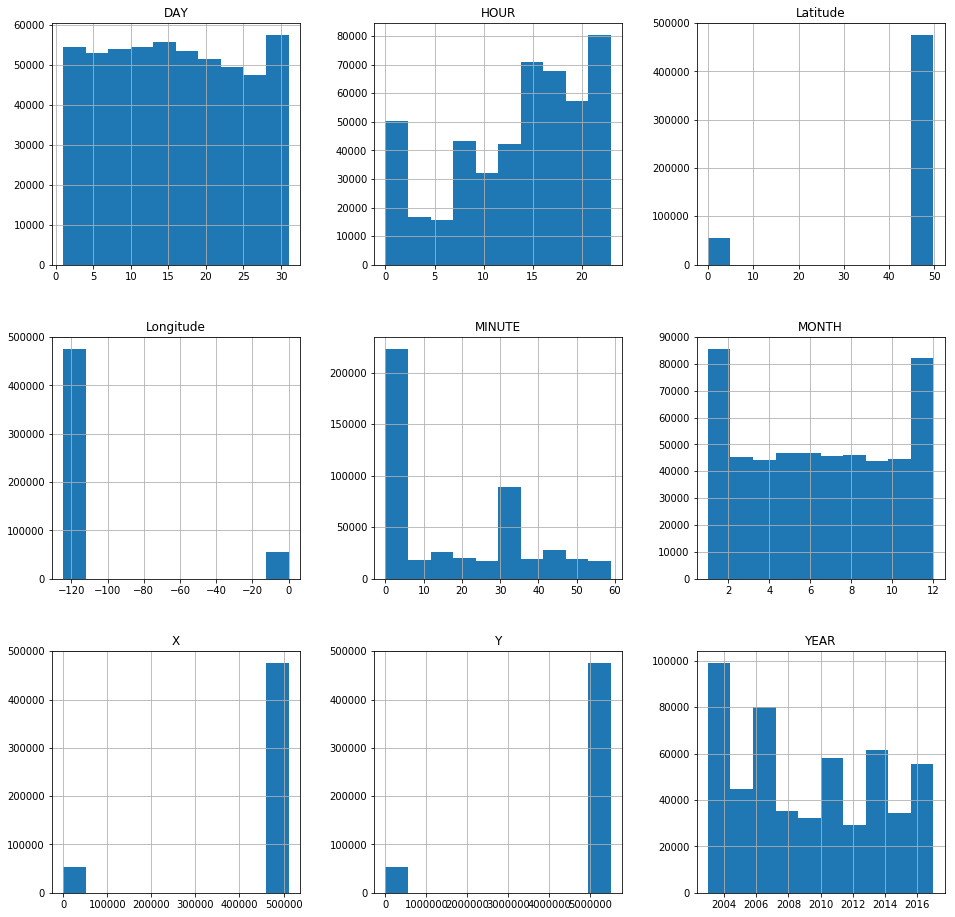

In [4]:
dataset2.hist(figsize=(16,16));

### Separando os dias da semana e período do dia

In [5]:
data= ['Segunda','Terca', 'Quarta', 'Quinta', 'Sexta','Sabado', 'Domingo']
periodo = ['morning','afternoon','night','dawn']

In [6]:
print(dataset2.isna().sum())
dataset2 = dataset2.dropna(axis=0)
dataset = dataset2.reset_index(drop=True)

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64


In [7]:
dataweak = []
dayPer = []
for i in range(dataset.shape[0]):
    x= date(dataset.iloc[i,1],dataset.iloc[i,2],dataset.iloc[i,3])
    hora = dataset.iloc[i,4]
    if hora >= 6 and hora <=12:
        value = 0
        
    elif(hora >12 and hora <18):
        value = 1
        
    elif(hora >=18 and hora <23):
        value = 2
        
    elif(hora < 6):
        value = 3
        
    dataweak.append(data[x.weekday()])
    dayPer.append(periodo[value])
    


frame = [pd.DataFrame(dataweak),pd.DataFrame(dayPer)]


In [8]:
datinha = pd.concat(frame,axis=1)
datinha.columns = ['WEAK_DAY','DAY_PERIOD']

In [9]:
tabela = pd.concat([dataset,datinha],axis=1)

In [10]:
tabela.to_csv("crime_modificado.csv",index=False)

In [11]:
tabela.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,WEAK_DAY,DAY_PERIOD
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Segunda,afternoon
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Quarta,afternoon
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Quarta,afternoon
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Domingo,morning
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Sabado,afternoon


### Separando em regiões

In [12]:
X_max = np.argmax(tabela.iloc[:,8])
X_min = np.argmin(tabela.iloc[:,8])
Y_max = np.argmax(tabela.iloc[:,9])
Y_min = np.argmin(tabela.iloc[:,9])
X_min

/home/johnny/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/home/johnny/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


346668

In [13]:

Xdif = tabela.iloc[X_max,8] - tabela.iloc[X_min,8]
Xdif

14596.359999999986

In [14]:
Ydif = tabela.iloc[Y_max,9] - tabela.iloc[Y_min,9]
Ydif

12502.240000000224

In [15]:
X_unidade = Xdif/14
y_unidade = Xdif/12
region = []
for i in range(tabela.shape[0]):
    x= tabela.iloc[i,8]
    y= tabela.iloc[i,9]
    countx = 0
    county = 0
    distancex = tabela.iloc[X_min,8]
    distancey = tabela.iloc[Y_min,9]
    for j in range(14):
        if x >= distancex: 
            distancex = distancex + X_unidade
        
        else:
            countx = j
            break
    
    for j in range(12):
        if y >= distancey: 
            distancey = distancey + y_unidade
        
        else:
            county = j
            break
    
    region.append(countx + 14*county)
    
    

In [16]:

result_final = pd.concat([tabela, pd.DataFrame(region,columns=['Region']) ],axis=1)
result_final.to_csv("crime_modificado.csv",index=False)

### Analisando os dados

In [3]:
tipo = {'TYPE':str,'YEAR':np.int32,'MONTH':np.int32,'DAY':np.int32,'HOUR':np.int32,'MINUTE':np.int32,'HUNDRED_BLOCK':str,'NEIGHBOURHOOD':str,'X':np.float64,'Y':np.float64,'Latitude':np.float64,'Longitude':np.float64,'WEAK_DAY':str,'DAY_PERIOD':str,'Region':str}
data_complete = pd.read_csv("crime_modificado.csv",dtype=tipo)
data_complete.head(7)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,WEAK_DAY,DAY_PERIOD,Region
0,Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Segunda,afternoon,108
1,Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,afternoon,108
2,Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,afternoon,108
3,Other Theft,2003,4,20,11,15,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Domingo,morning,108
4,Other Theft,2003,4,12,17,45,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Sabado,afternoon,108
5,Other Theft,2003,3,26,20,45,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,Quarta,night,108
6,Break and Enter Residential/Other,2003,3,10,12,0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610,Segunda,morning,48


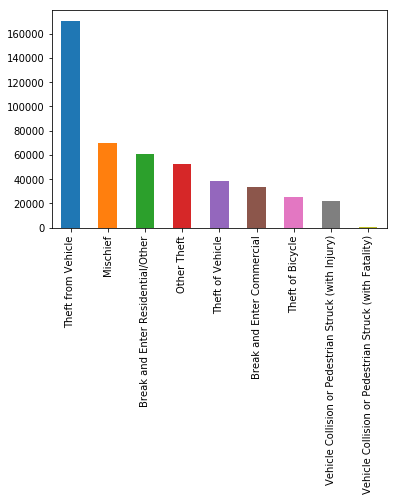

In [18]:
data_complete['TYPE'].value_counts().plot(kind= 'bar');

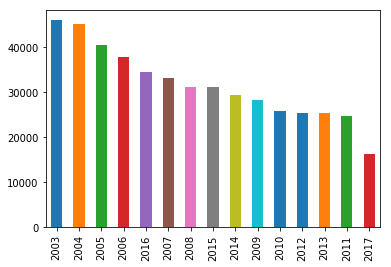

In [19]:
data_complete['YEAR'].value_counts().plot(kind= 'bar');

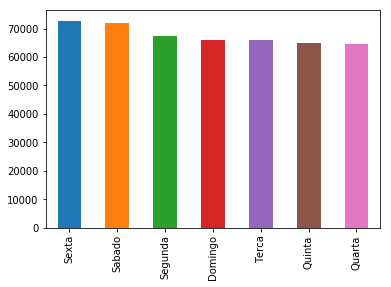

In [20]:
data_complete['WEAK_DAY'].value_counts().plot(kind= 'bar');

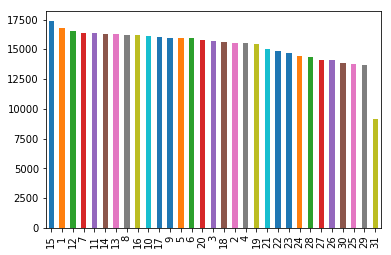

In [21]:
data_complete['DAY'].value_counts().plot(kind= 'bar');

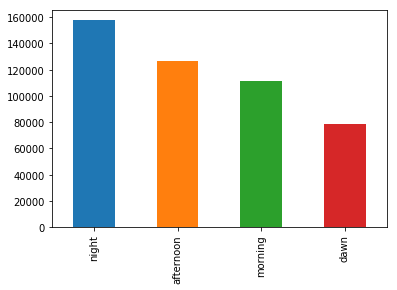

In [22]:
data_complete['DAY_PERIOD'].value_counts().plot(kind= 'bar');

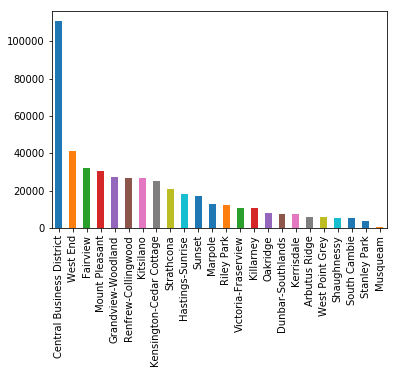

In [23]:
data_complete['NEIGHBOURHOOD'].value_counts().plot(kind= 'bar');

In [24]:
data = data_complete.drop(columns=['HOUR','HUNDRED_BLOCK','NEIGHBOURHOOD','Latitude','Longitude','YEAR','MINUTE','DAY','MONTH','X','Y'], axis=1)


In [25]:
label = preprocessing.LabelEncoder()
data['TYPE'] = label.fit_transform(data['TYPE'])
#label1 = preprocessing.LabelEncoder()
#data['HUNDRED_BLOCK'] = label1.fit_transform(data['HUNDRED_BLOCK'])

#label2 = preprocessing.LabelEncoder()
#data['NEIGHBOURHOOD'] = label2.fit_transform(data['NEIGHBOURHOOD'])

#label3 = preprocessing.LabelEncoder()
#data['YEAR'] = label3.fit_transform(data['YEAR'])

#label4 = preprocessing.LabelEncoder()
#data['WEAK_DAY'] = label4.fit_transform(data['WEAK_DAY'])

#label5 = preprocessing.LabelEncoder()
#data['DAY_PERIOD'] = label5.fit_transform(data['DAY_PERIOD'])

data.head()

,TYPE,WEAK_DAY,DAY_PERIOD,Region
0,3,Segunda,afternoon,108
1,3,Quarta,afternoon,108
2,3,Quarta,afternoon,108
3,3,Domingo,morning,108
4,3,Sabado,afternoon,108


In [26]:
#ohe = preprocessing.OneHotEncoder(categorical_features=[4,5])
#X_Moral = ohe.fit_transform(data.iloc[:,1:])
#X_Moral = data.iloc[:,1:]
y_Moral = data.iloc[:,0]
#np.shape(X_Moral)
X_Moral = pd.get_dummies(data)#modificado
X_Moral1 = pd.get_dummies(data.iloc[:,1:])
X_Moral1.head()


,WEAK_DAY_Domingo,WEAK_DAY_Quarta,WEAK_DAY_Quinta,WEAK_DAY_Sabado,WEAK_DAY_Segunda,WEAK_DAY_Sexta,WEAK_DAY_Terca,DAY_PERIOD_afternoon,DAY_PERIOD_dawn,DAY_PERIOD_morning,...,Region_90,Region_91,Region_92,Region_93,Region_94,Region_95,Region_96,Region_97,Region_98,Region_99
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redução de Dimensionalidade

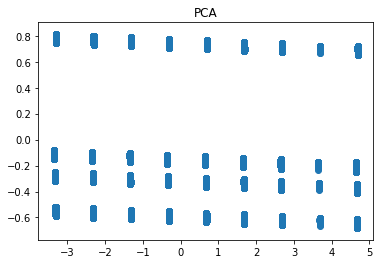

/home/johnny/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


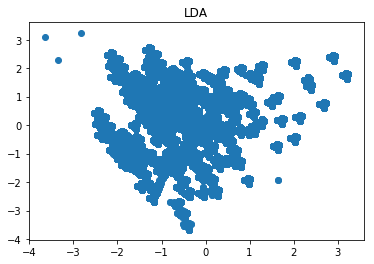

In [27]:
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_Moral)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.title('PCA')
plt.show();
lda=LDA(n_components=2)
X_train_lda = lda.fit_transform(X_Moral1, y_Moral)
plt.scatter(X_train_lda[:,0],X_train_lda[:,1])
plt.title('LDA')
plt.show();

### Gráfico do Cotovelo

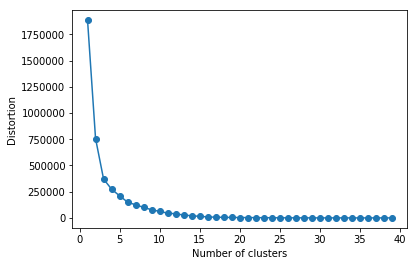

In [28]:
distortions = []
for i in range(1, 40):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_train_pca)
    distortions.append(km.inertia_)
plt.plot(range(1, 40), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Criando Modelos de Clusterização

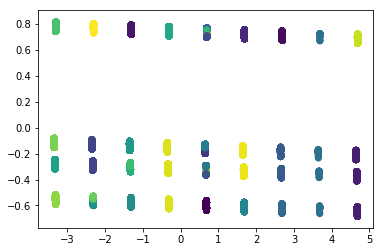

In [29]:
km = cluster.KMeans(n_clusters=36,
                init='random', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
km.fit(X_train_pca)
y_km = km.predict(X_train_pca)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_km);

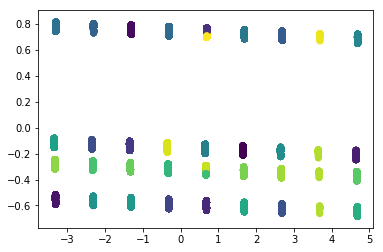

In [30]:
km_p = cluster.KMeans(n_clusters=36,
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
km_p.fit(X_train_pca)
y_km_p = km_p.predict(X_train_pca)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_km_p);

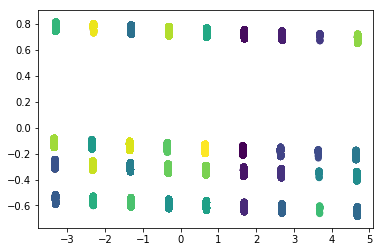

In [31]:
bir = cluster.Birch(threshold=0.05,n_clusters=36)
y_bir = bir.fit_predict(X_train_pca)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_bir);

In [32]:
data_final = pd.concat([data_complete,pd.DataFrame(y_bir,columns=['Cluster'])],axis=1)
data_final.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,WEAK_DAY,DAY_PERIOD,Region,Cluster
0,Other Theft,2003,5,12,16,15,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Segunda,afternoon,108,18
1,Other Theft,2003,5,7,15,20,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Quarta,afternoon,108,18
2,Other Theft,2003,4,23,16,40,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Quarta,afternoon,108,18
3,Other Theft,2003,4,20,11,15,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Domingo,morning,108,27
4,Other Theft,2003,4,12,17,45,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,Sabado,afternoon,108,18


#### Resultado Insastisfatório

### Pré-Processamento para Forecast

In [4]:
df =  data_complete.copy()
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})
df = df.groupby('DATE').count()['TYPE'].to_frame()
df.reset_index(inplace=True)
df.columns = ['ds','y']

df = df.drop(index= df['y'].idxmax())
df.tail()


,ds,y
5303,2017-07-09,100
5304,2017-07-10,93
5305,2017-07-11,100
5306,2017-07-12,91
5307,2017-07-13,47


### Descrição dos dados

In [6]:
df.describe()

,y
count,5307.000000
mean,89.203693
std,24.385292
min,24.000000
25%,71.000000
50%,86.000000
75%,105.000000
max,201.000000


In [34]:

z = np.polyfit(range(df.shape[0]),df.iloc[:,1],10)
p = np.poly1d(z)


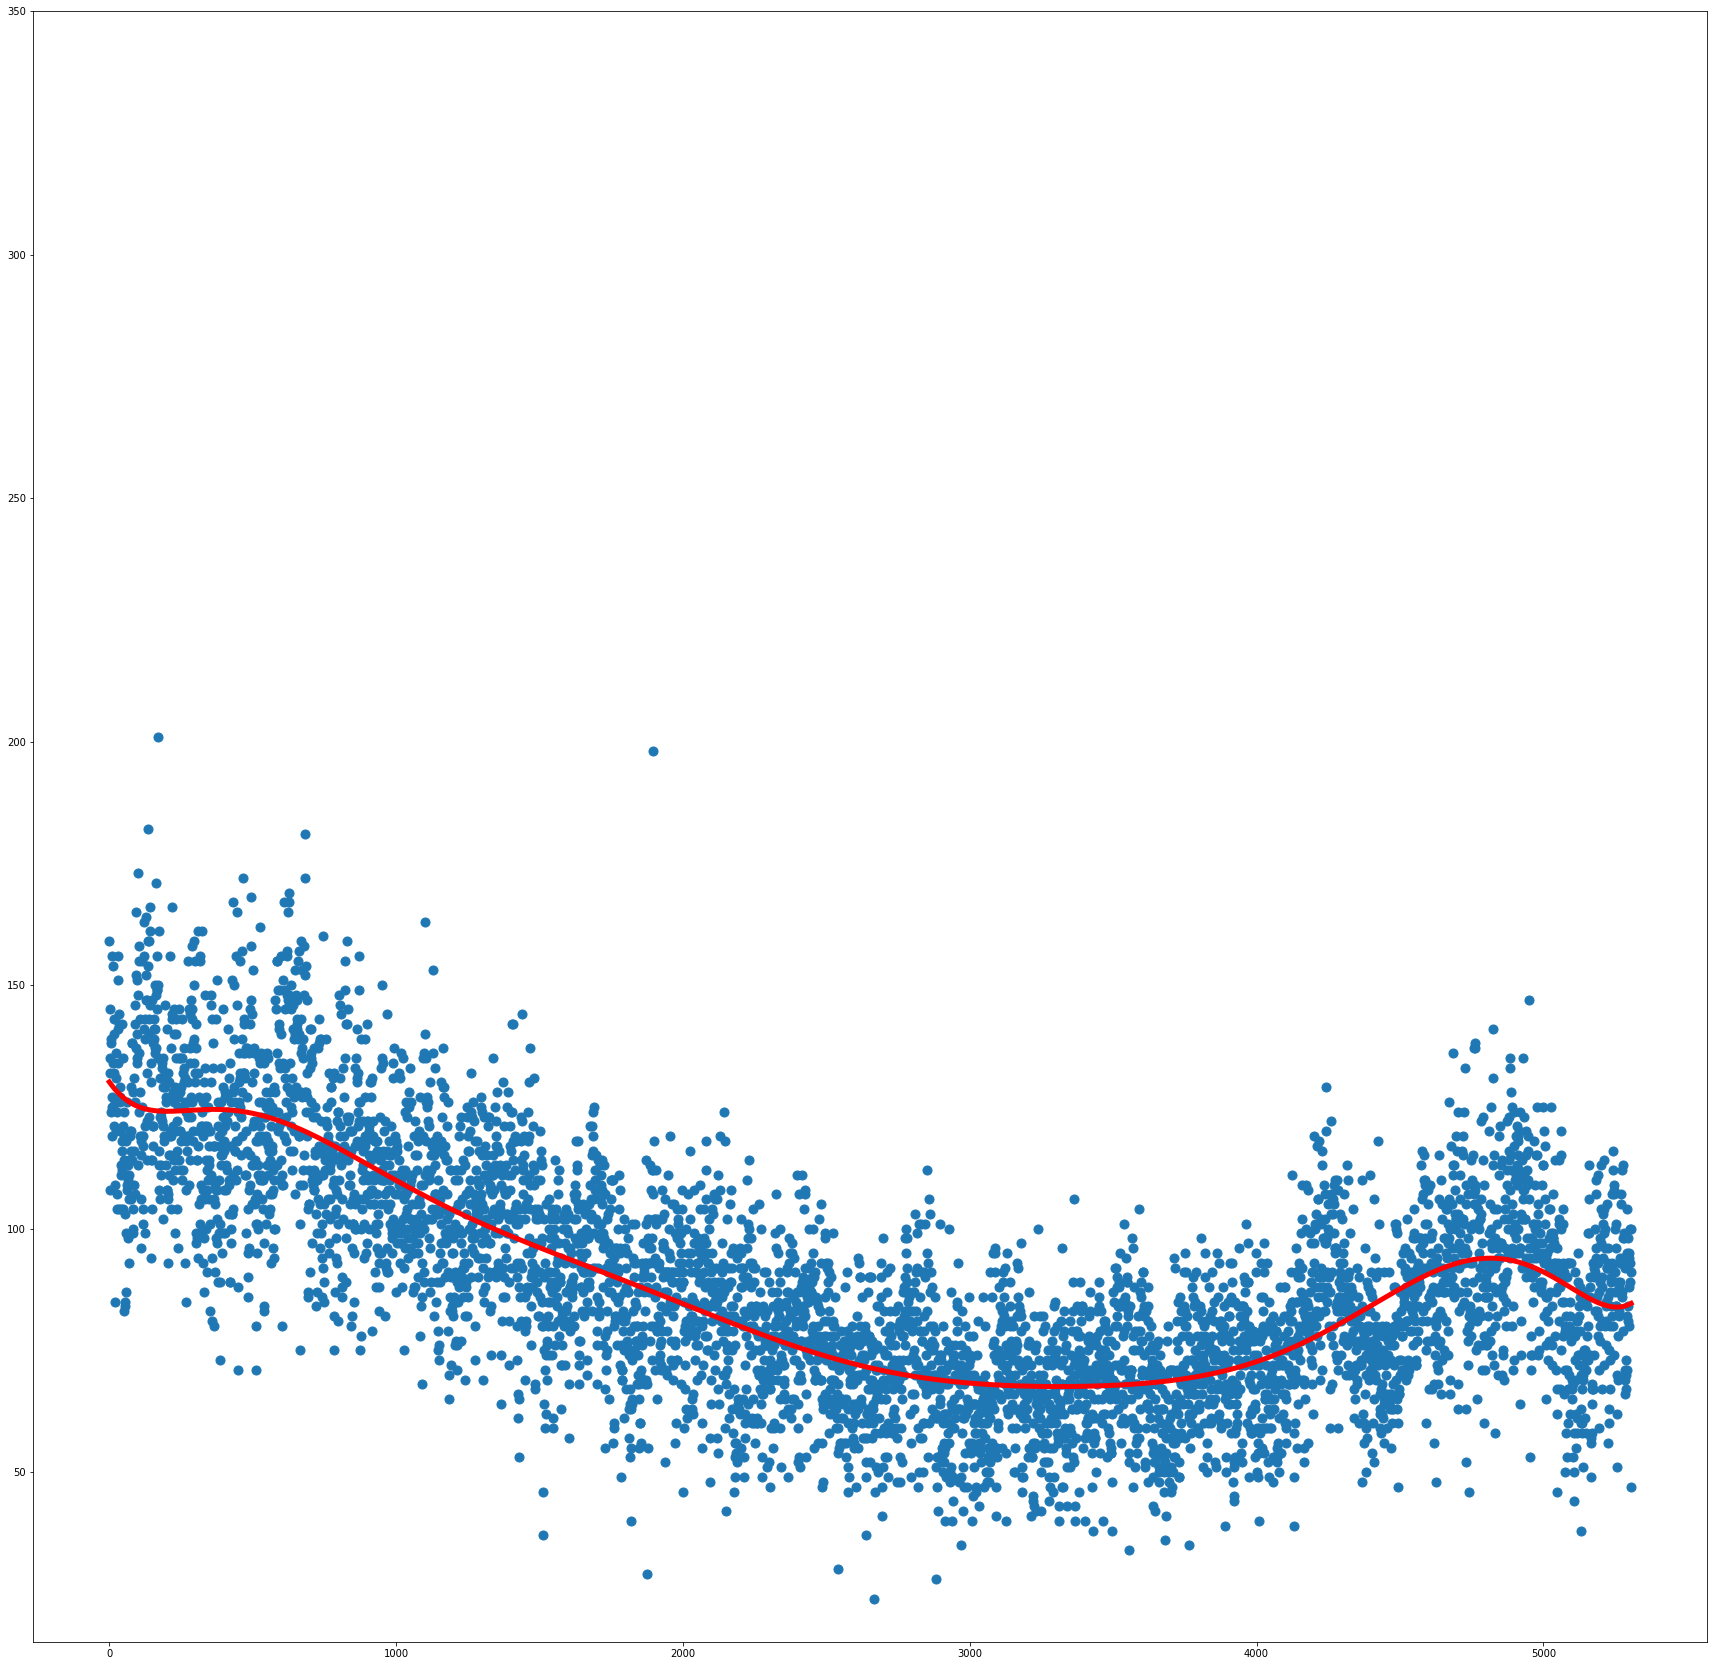

In [35]:
plt.figure(figsize=(30,30))
plt.scatter(range(df.iloc[:,0].count()),df.iloc[:,1],s=82);
plt.plot(p(range(df.iloc[:,0].count())),color='red',linewidth=5)
##plt.plot(np.array(np.reshape(range(df.shape[0]+1095),(df.shape[0]+1095,1))), XGB.predict(np.array(np.reshape(range(df.shape[0]+1095),(df.shape[0]+1095,1)))),color='black',linewidth=5)
plt.ylim(ymax=350)
plt.show()

In [36]:
train, test = model_selection.train_test_split(df.iloc[:,:], shuffle=False, train_size=0.8, test_size=0.2)

#Prophet
Prop = Prophet()
Prop.fit(train)
future = Prop.make_future_dataframe(periods=test.shape[0])
forecast = Prop.predict(future)

#Arima
arima = auto_arima(train.iloc[:,1])
y_arima = arima.predict(n_periods=test.shape[0])





INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/johnny/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/johnny/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:832: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/johnny/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:832: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/joh

RMSE = 17.03869419153542


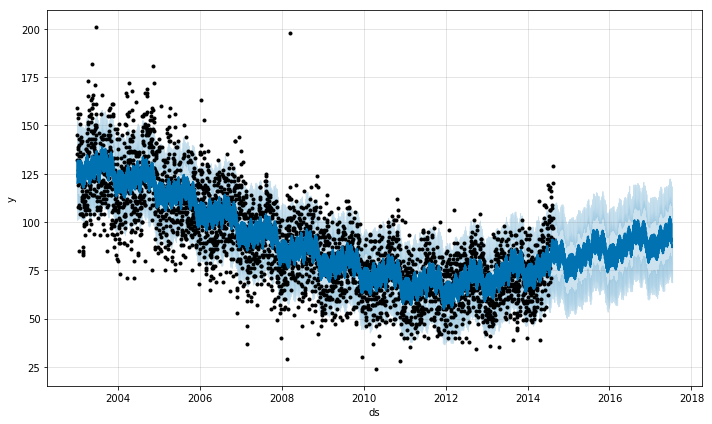

In [37]:
RMSE = np.sqrt(metrics.mean_squared_error(test.iloc[:,1],forecast.iloc[:,1].tail(test.shape[0])))
print("RMSE = {}".format(RMSE) )
Prop.plot(forecast);

RMSE = 17.361092364676626


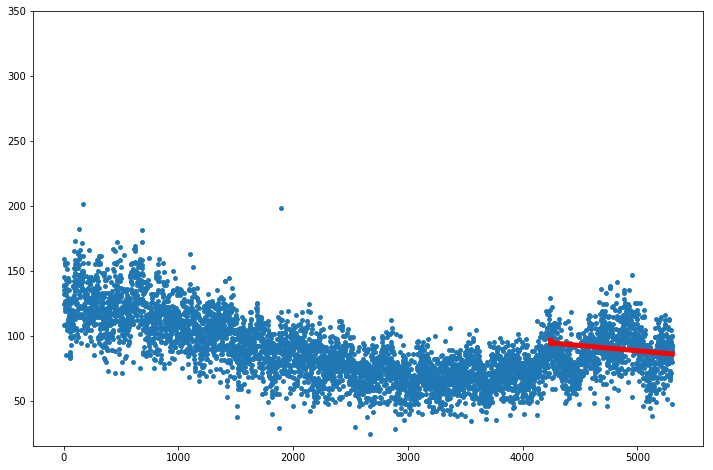

In [38]:
RMSE = np.sqrt(metrics.mean_squared_error(test.iloc[:,1],y_arima))
print("RMSE = {}".format(RMSE) )
plt.figure(figsize=(12,8))
plt.scatter(range(df.iloc[:,0].count()),df.iloc[:,1],s=15);
plt.plot(np.array(range(test.iloc[:,1].count()))+ train.shape[0],y_arima,color='red',linewidth=5)
plt.ylim(ymax=350)
plt.show()

### Melhor RMSE foi do Prophet

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/johnny/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


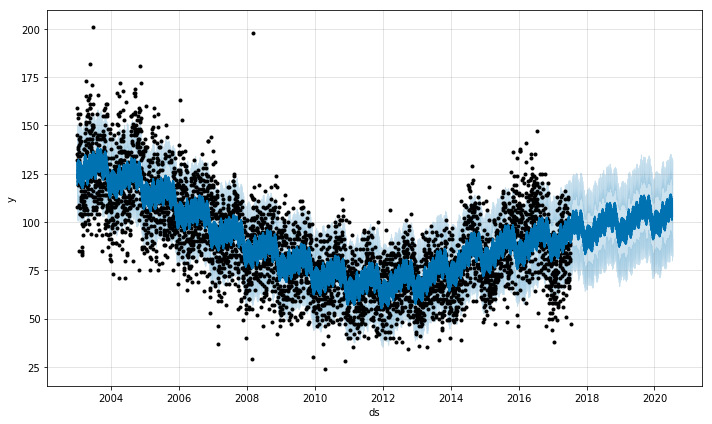

In [39]:
Prop = Prophet()
Prop.fit(df)
future = Prop.make_future_dataframe(periods=1095)
forecast = Prop.predict(future)
Prop.plot(forecast);

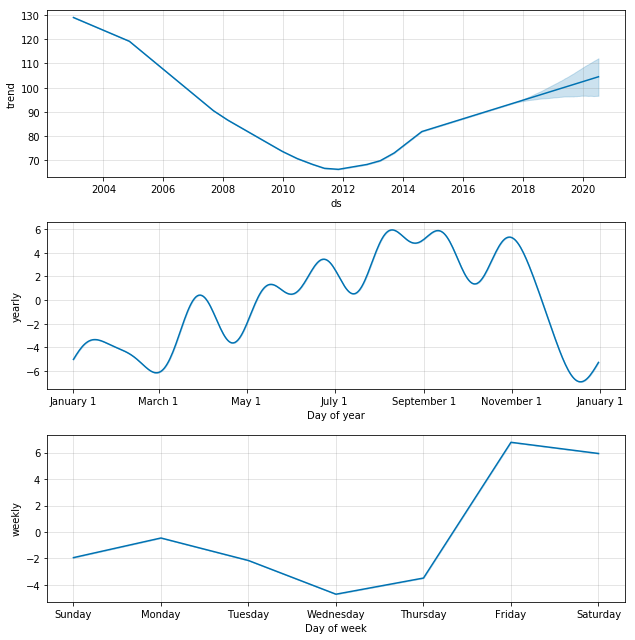

In [40]:
Prop.plot_components(forecast);

In [41]:
forecast.iloc[:,1].tail(20)

6382    104.322954
6383    104.333446
6384    104.343937
6385    104.354429
6386    104.364921
6387    104.375413
6388    104.385905
6389    104.396396
6390    104.406888
6391    104.417380
6392    104.427872
6393    104.438364
6394    104.448855
6395    104.459347
6396    104.469839
6397    104.480331
6398    104.490822
6399    104.501314
6400    104.511806
6401    104.522298
Name: trend, dtype: float64

### Foi possível prever o número de crimes que podem acontecer diaríamente durante 3 anos